In [1]:

import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import LabelEncoder
CSV_PATH="merged_clean.csv"
df=pd.read_csv(CSV_PATH)
random_seed=47


In [2]:
df

,author,context,additional_context,song_title,song_text,source
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga
3,Владо Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga
...,...,...,...,...,...,...
1221,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ
1222,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ
1223,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ
1224,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ


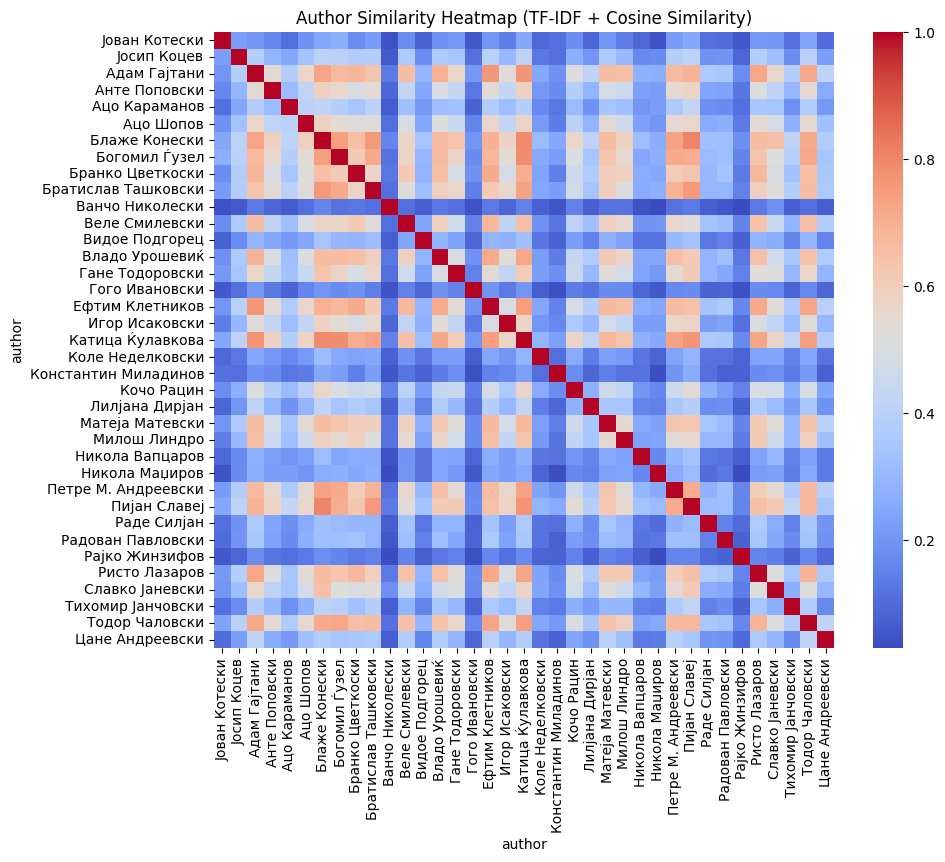


Top 5 similar authors for Јован Котески:
  Богомил Ѓузел: 0.272
  Пијан Славеј: 0.253
  Катица Ќулавкова: 0.249
  Блаже Конески: 0.248
  Тодор Чаловски: 0.239

Top 5 similar authors for Јосип Коцев:
  Катица Ќулавкова: 0.411
  Блаже Конески: 0.408
  Пијан Славеј: 0.405
  Богомил Ѓузел: 0.401
  Тодор Чаловски: 0.399

Top 5 similar authors for Адам Гајтани:
  Катица Ќулавкова: 0.768
  Ефтим Клетников: 0.762
  Блаже Конески: 0.728
  Ристо Лазаров: 0.725
  Тодор Чаловски: 0.718

Top 5 similar authors for Анте Поповски:
  Блаже Конески: 0.589
  Катица Ќулавкова: 0.585
  Пијан Славеј: 0.575
  Богомил Ѓузел: 0.553
  Петре М. Андреевски: 0.548

Top 5 similar authors for Ацо Караманов:
  Пијан Славеј: 0.431
  Блаже Конески: 0.415
  Ацо Шопов: 0.405
  Братислав Ташковски: 0.402
  Катица Ќулавкова: 0.390

Top 5 similar authors for Ацо Шопов:
  Блаже Конески: 0.588
  Катица Ќулавкова: 0.575
  Адам Гајтани: 0.565
  Ефтим Клетников: 0.562
  Пијан Славеј: 0.558

Top 5 similar authors for Блаже Конес

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- Build similarity matrix ---
author_corpus = df.groupby("author")["song_text"].apply(lambda x: " ".join(x)).reset_index()

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(author_corpus["song_text"])

similarity_matrix = cosine_similarity(X, X)

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=author_corpus["author"],
    columns=author_corpus["author"]
)

# --- 1. Heatmap visualization ---
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Author Similarity Heatmap (TF-IDF + Cosine Similarity)")
plt.show()

# --- 2. Print top 5 similar authors for each author ---
for author in similarity_df.index:
    sims = similarity_df.loc[author].drop(author)  # drop self similarity
    top5 = sims.sort_values(ascending=False).head(5)
    print(f"\nTop 5 similar authors for {author}:")
    for other, score in top5.items():
        print(f"  {other}: {score:.3f}")


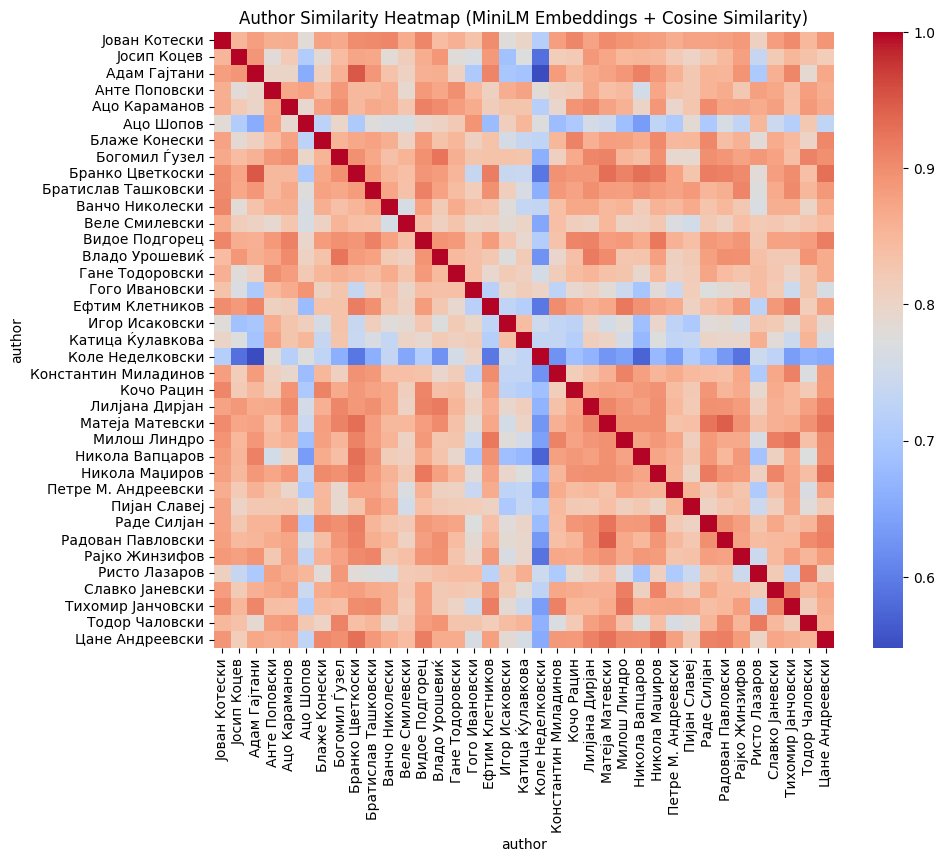


Top 5 similar authors for Јован Котески:
  Кочо Рацин: 0.908
  Видое Подгорец: 0.908
  Ванчо Николески: 0.908
  Братислав Ташковски: 0.904
  Матеја Матевски: 0.902

Top 5 similar authors for Јосип Коцев:
  Адам Гајтани: 0.892
  Владо Урошевиќ: 0.889
  Лилјана Дирјан: 0.888
  Ефтим Клетников: 0.887
  Рајко Жинзифов: 0.880

Top 5 similar authors for Адам Гајтани:
  Бранко Цветкоски: 0.950
  Никола Вапцаров: 0.913
  Ефтим Клетников: 0.909
  Тихомир Јанчовски: 0.907
  Рајко Жинзифов: 0.892

Top 5 similar authors for Анте Поповски:
  Гане Тодоровски: 0.898
  Богомил Ѓузел: 0.888
  Видое Подгорец: 0.886
  Тодор Чаловски: 0.881
  Ристо Лазаров: 0.879

Top 5 similar authors for Ацо Караманов:
  Видое Подгорец: 0.913
  Лилјана Дирјан: 0.904
  Владо Урошевиќ: 0.902
  Раде Силјан: 0.901
  Богомил Ѓузел: 0.899

Top 5 similar authors for Ацо Шопов:
  Гого Ивановски: 0.893
  Анте Поповски: 0.878
  Ристо Лазаров: 0.851
  Катица Ќулавкова: 0.851
  Тодор Чаловски: 0.824

Top 5 similar authors for Блаж

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2",device='cpu')

author_corpus = df.groupby("author")["song_text"].apply(lambda x: " ".join(x)).reset_index()

embeddings = model.encode(author_corpus["song_text"], convert_to_tensor=False, normalize_embeddings=True)

similarity_matrix = cosine_similarity(embeddings)

similarity_df = pd.DataFrame(   
    similarity_matrix,
    index=author_corpus["author"],
    columns=author_corpus["author"]
)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Author Similarity Heatmap (MiniLM Embeddings + Cosine Similarity)")
plt.show()

for author in similarity_df.index:
    sims = similarity_df.loc[author].drop(author)  # drop self-similarity
    top5 = sims.sort_values(ascending=False).head(5)
    print(f"\nTop 5 similar authors for {author}:")
    for other, score in top5.items():
        print(f"  {other}: {score:.3f}")
